## Sentiment Analysis on IMDB Dataset Using Simple RNN

In this project, I implemented a sentiment analysis model using a Simple Recurrent Neural Network (RNN) on the IMDB movie review dataset. My focus was on optimizing the model's performance and experimenting with different RNN configurations to better understand the impact of various hyperparameters on model accuracy.

### 1. Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

### 2. Load and Explore the IMDB Dataset

In [2]:
# Set vocabulary size
max_features = 10000

# Load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Print the shape of the data
print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}')

Training data shape: (25000,), Training labels shape: (25000,)
Testing data shape: (25000,), Testing labels shape: (25000,)


In [3]:
# Inspect a sample review and its label
sample_review = X_train[0]
sample_label = y_train[0]

print(f"Sample review (as integers): {sample_review}")
print(f'Sample label: {sample_label}')

Sample review (as integers): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Sample label: 1


### 3. Data Exploration: Review Length Distribution
To better understand the data, let's plot the distribution of review lengths.

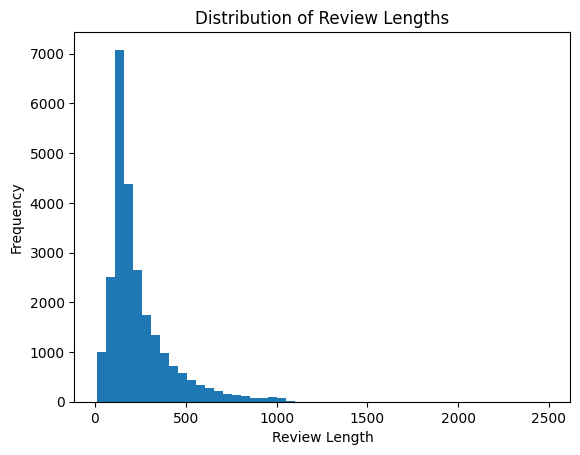

In [4]:
review_lengths = [len(x) for x in X_train]

plt.hist(review_lengths, bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

### 4. Decoding a Review
Mapping the word indices back to words to see the actual review.

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sample_review])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### 5. Data Preprocessing: Padding Sequences
We will pad the sequences to ensure uniform input length.

In [6]:
max_len = 500

X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)

print(X_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

### 6. Building the Simple RNN Model
To improve the model's performance, I added an additional RNN layer with a Dropout layer for regularization.

In [7]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))  # Embedding layer
model.add(SimpleRNN(128, activation='relu', return_sequences=True))  # First RNN layer with return_sequences
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(SimpleRNN(64, activation='relu'))  # Second RNN layer
model.add(Dense(1, activation="sigmoid"))  # Output layer

### 7. Model Summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 500, 128)          32896     
                                                                 
 dropout (Dropout)           (None, 500, 128)          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1325313 (5.06 MB)
Trainable params: 1325313 (5.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 8. Compile the Model

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### 9. Early Stopping Callback
To prevent overfitting, I added an early stopping callback.

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


### 10. Training the Model
The model is trained with early stopping to ensure it doesn't overfit.

In [11]:
history = model.fit(
    X_train, y_train, epochs=20, batch_size=32,
    validation_split=0.2,
    callbacks=[earlystopping]
)

Epoch 1/20


625/625 [==============================] - 273s 431ms/step - loss: 0.5356 - accuracy: 0.7155 - val_loss: 0.4535 - val_accuracy: 0.7766
Epoch 2/20
625/625 [==============================] - 275s 440ms/step - loss: 0.4144 - accuracy: 0.8110 - val_loss: 27595816960.0000 - val_accuracy: 0.7708
Epoch 3/20
625/625 [==============================] - 343s 549ms/step - loss: 361361216.0000 - accuracy: 0.8224 - val_loss: 0.4038 - val_accuracy: 0.8310
Epoch 4/20
625/625 [==============================] - 327s 524ms/step - loss: 0.2718 - accuracy: 0.8889 - val_loss: 0.4085 - val_accuracy: 0.8368
Epoch 5/20
625/625 [==============================] - 303s 485ms/step - loss: 0.2408 - accuracy: 0.9028 - val_loss: 0.4639 - val_accuracy: 0.8336
Epoch 6/20
625/625 [==============================] - 283s 453ms/step - loss: 0.1977 - accuracy: 0.9248 - val_loss: 0.4778 - val_accuracy: 0.8318
Epoch 7/20
625/625 [==============================] - 281s 449ms/step - loss: 0.1572 - accuracy: 0.9414 

### 11. Visualizing Training and Validation Accuracy
To evaluate the model's performance, let's plot the training and validation accuracy over the epochs.

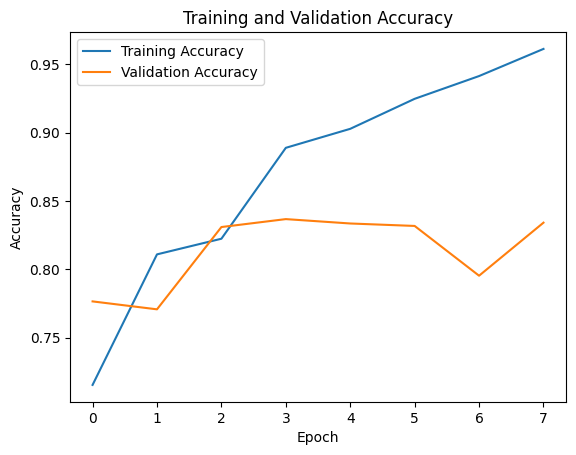

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### 12. Saving the Model

In [13]:
## Save model file
model.save('model.h5')

d:\Project\RNN\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 13. Conclusion
This project provided hands-on experience with building and fine-tuning a sentiment analysis model using Simple RNN. I learned the importance of data preprocessing, model architecture tuning, and regularization techniques. One of the challenges was to mitigate overfitting, which I addressed by adding dropout layers and experimenting with the model architecture.